# Notebook zu Blatt 8

In [62]:
import math

import matplotlib.pyplot as plt
import numpy
!pip install numpy seaborn

You should consider upgrading via the 'C:\Users\valen\PycharmProjects\AlgoAbgabe\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [63]:
import numpy as np      # um zufÃ¤llige arrays zu generieren
import time   # zur zeitmessung
import random # für die Auswahl des Pivot-Elements
import seaborn as sns   # zum plotten

####  1. Implementieren Sie Selection Sort und Quicksort in Python

In [64]:
def selectionSort(array):
    array = array.copy()
    result= []
    while array:
        min = np.Infinity
        for elem in array:
            if elem < min:
                min = elem
        array.remove(min)

        result.append(min)
    return result




#hallo

In [65]:
array = [7,5,8,1] 
array =selectionSort(array)
print(array) # das sortierte array

[1, 5, 7, 8]


In [66]:
def quickSort(array):
    smaller=[]
    equal=[]
    greater = []
    if len(array) > 1:
        pivot = random.choice(array)
        for a in array:
            if a < pivot:
                smaller.append(a)
            elif a == pivot:
                equal.append(a)
            elif a > pivot:
                greater.append(a)
        return quickSort(smaller)+equal+quickSort(greater)
    else:
        return array

In [67]:
array = [7,5,8,1] 
array = quickSort(array)
print(array) # das sortierte array
# Zu Aufgabe 2:
# Die Laufzeit des Algorithmus ist unter anderem auch abhängig durch die Wahl des Pivot-Elements. Durch
# dieses wird in jedem Rekursionsschritt die zu sortierende Liste aufgeteilt. Um einen besonders schnellen
# Algorithmus zu haben möchte man, dass in jedem Rekursionsschritt die gegebene Liste in möglichst gleich
# große größer/kleiner Sublisten aufgeteilt wird, damit man insgesamt weniger Rekursionsschritte hat.
# Dafür ist alleine das Pivot-Element verantwortlich.
# Bie dieser Implementierung wird ein zufälliges Element der gegebenen Liste immer als
# Pivot-Element gewählt.
#Zu Aufgabe 3:
# QuickSort-Worst-Case:
# Dadurch, dass das Pivot-Element zufällig gewählt wird gibt ist die einzige worst case
# Eingabe jene, die sich in jedem Element unterscheidet und somit immer nur ein Element in
# der equal-Liste pro Rekursion landet.
# SelectionSort:
# Die Worst-case Eingabe ist eine genau falschrum sortierte Liste. Da dort immer durch die
# ganze Liste gegangen werden muss um ein Element zu finden welches in die result liste
# eingefügt werden kann.

[1, 5, 7, 8]


#### 4. Testen Sie die Korrektheit Ihrer Implementierungen anhand von verschiedenen TestfÃ¤llen

In [68]:
# Hier kommen die TestfÃ¤lle!
test1 = [1,1,1,1,1,1,1,1]
test2 = [9,8,7,6,5,4,3,2,1]


#### 5. Messen Sie die Laufzeit der beiden Sortieralgorithmen auf Ihrem Rechner.

In [69]:
s_times, q_times, sort_times = [], [], []
arrar_sizes =  [10, 100, 500, 1000, 1500, 2000, 2500, 3000, 5000, 7500, 10000] # messung fÃ¼r verschiedenen array-lÃ¤ngen
for size in arrar_sizes:
    # ziehe ein zufÃ¤lliges array
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size).tolist()

    start = time.time()
    selectionSort(array) #sortieren des Arrays
    end = time.time()
    s_times.append(end-start) # die zeit in sekunden

    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size)
    qstart = time.time()
    quickSort(array) #sortieren des Array
    qend = time.time()
    q_times.append(qend - qstart)

    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size).tolist()
    sortstart = time.time()
    array.sort
    sortend = time.time()
    sort_times.append(sortend -sortstart)



print("selectionSort Werte:")
for elem in s_times:
    print(elem)

print("quickSort Werte:")
for elem in q_times:
    print(elem)

    # und dann jetzt noch fÃ¼r quicksort :)

selectionSort Werte:
0.0
0.0
0.0040018558502197266
0.017032146453857422
0.03691887855529785
0.08164358139038086
0.0635228157043457
0.0905160903930664
0.27799177169799805
0.5485081672668457
0.9687507152557373
quickSort Werte:
0.0
0.0
0.0009591579437255859
0.0030105113983154297
0.003039121627807617
0.005907535552978516
0.00400090217590332
0.0039997100830078125
0.009516716003417969
0.012917518615722656
0.018901824951171875


#### 6. Erstellen Sie einen geeignent Plot, der die Laufzeit der beiden Algorithmen in AbhÃ¤ngigkeit von der EingabelÃ¤nge darstellt

<AxesSubplot: >

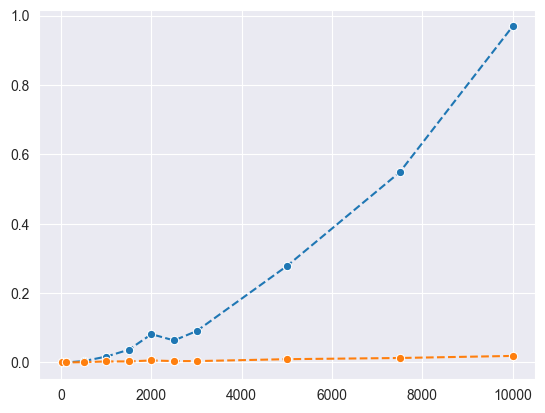

In [70]:
# Java QuickSort (NotInPlace) in Millisekunden [0.001, 0.001, 0.003, 0.004, 0.003, 0.004, 0.005, 0.006,
    # 0.006, 0.012, 0.013]
# wir berechen hier schon einige Werte ( @Moritz : vielleicht das noch ändern)
def computeC(time_list, size_list,func):
     length = len(time_list)
     iterator = range(length)
     plus = 0
     for i in iterator:
      plus +=  time_list[i]/func(size_list[i]) #wir berechnen C in dem wir die tatsächliche Zeit durch die Worstcase Operationen teilen und dann den Durchschnitt berechnen
     plus = plus/length
     return plus

cselec = computeC(s_times,arrar_sizes, lambda x : x**2)

cwerte =  map(lambda x : cselec* x**2, arrar_sizes)
cquick = computeC(q_times,arrar_sizes, lambda x : x* math.log2(x))
qwerte = map(lambda x: cquick* x * math.log2(x), arrar_sizes)


#Hier kommt der Plot
sns.lineplot(x = arrar_sizes, y= s_times, linestyle = "dashed", marker = "o") #diese Linie ist blau
sns.lineplot(x = arrar_sizes, y= q_times, linestyle = "dashed", marker = "o" )#diese Linie ist gelb



# In der Praxis macht die Laufzeit ab ca. 1000 Elementen einen bedeutenden Unterschied, der dann immer größer wird, daher wirkt die Laufzeit von Quicksort nahezu asymptotisch









#### 7. Erstellen Sie fÃ¼r die beiden Sortieralgorithmen jeweils einen Plot, in dem gemessene Laufzeit durch die entsprechende asymptotische Laufzeitentwicklung approximiert wird.

Die Konstante für Quicksort:
1.5141711004667002e-07


<AxesSubplot: >

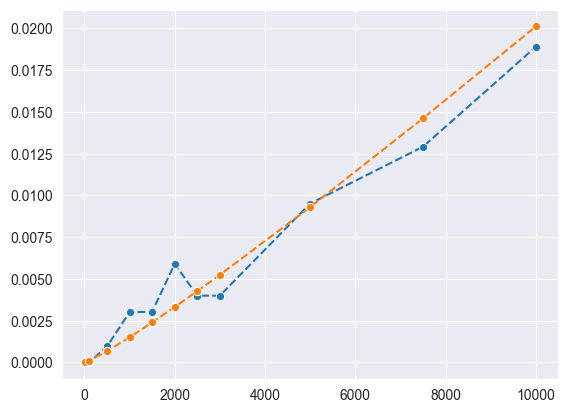

In [71]:
# Hier kommen die Plots!
#1. Quicksort
print("Die Konstante für Quicksort:")
print(cquick)
sns.lineplot(x= arrar_sizes,y =q_times,linestyle= "dashed", marker = "o") #diese Linie ist blau
sns.lineplot(x= arrar_sizes, y= qwerte , linestyle = "dashed", marker = "o")# diese Linie ist orange

Die Konstante für Selectionsort:
1.096711671713627e-08


<AxesSubplot: >

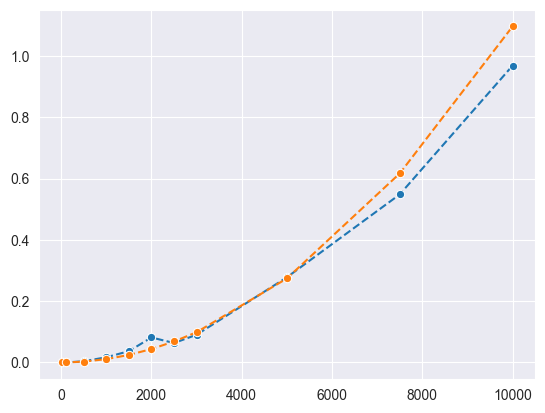

In [72]:
#2. selection sort
print("Die Konstante für Selectionsort:")
print(cselec)
sns.lineplot(x = arrar_sizes, y= s_times, linestyle = "dashed", marker = "o") #diese Linie ist blau
sns.lineplot(x = arrar_sizes, y= cwerte, linestyle = "dashed", marker = "o" )#diese Linie ist gelb

#### 8. Vergleichen Sie die Laufzeit von ihrer Implementation von Quicksort in Python und der in einer Programmiersprache ihrer Wahl

<AxesSubplot: >

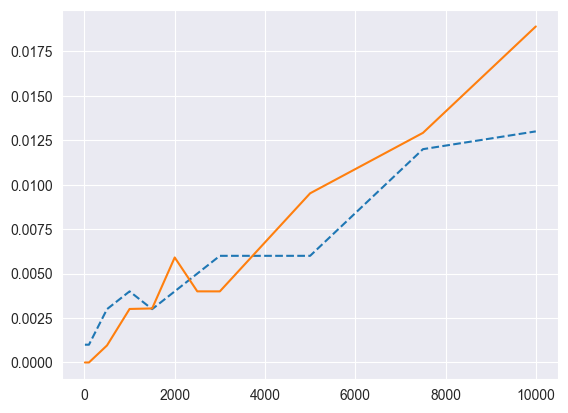

In [73]:
#Die Programmiersprache unserer Wahl ist Java
java_time = [0.001, 0.001, 0.003, 0.004, 0.003, 0.004, 0.005, 0.006, 0.006, 0.012, 0.013]#Ein Array eines von unserer Implementierung generierten Durchlaufes

sns.lineplot(x = arrar_sizes, y= java_time, linestyle = "dashed", markers="o")# Zeit für Java
sns.lineplot(x = arrar_sizes, y = q_times, markers = "o")# Zeit in Python

# wir sehen, dass Python langsamer ist, als die Java Implementation. Allerdings ist der Unterschied nicht so bedeutend , wie z.B ein Unterschied in der O-Notation, aber gerade bei größeren Daten wird dieser in der Praxis bedeutend sein

#### 9. . Vergleichen Sie die Laufzeit ihrer effizienten Implementierungen mit der Laufzeit der nativen sort() Funktion fÃ¼r Listen in Python

In [73]:
# Das Messen der nativen Funktion machen wir in Zelle 5 mit den anderen Messungen




### 10. Wie sehen sie das Verhältnis zwischen einer effizienten Implementierung und der theoretischen Analyse der asymptotischen Laufzeit? Was ist die Größenordnung des konstanten Faktors, der durch die Wahl der Programmiersprache bestimmt wird?